## The Mood of the News

In [15]:
#Dependencies
import pandas as pd
import tweepy
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [28]:
# Target Search Term
target_user = "@BBCNews"
#"@CNN", "@CBSNews","@FoxNews", "@nytimes"

# Array to hold sentiments
sentiments = []

# Convert tweet timestamps to datetime objects that can be manipulated by Python
converted_timestamps = []

# Variable for holding the oldest tweet
oldest_tweet = None

# Variables for holding sentiments
compound_list = []

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
        
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
            
        #Convert the raw tweet time to correct datetime stamp.
        converted_time = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
    
        # Add sentiments for each tweet into an array
        sentiments.append({"News Source": target_user,
                           "Date": converted_time, 
                           "Compound": compound,
                           "Tweets Ago": counter})
        # Add to counter 
        counter = counter + 1

In [31]:
# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df.head(10)

,Compound,Date,News Source,Tweets Ago
0,-0.3612,2017-11-29 19:40:45+00:00,@BBCNews,1
1,0.0000,2017-11-29 17:43:25+00:00,@BBCNews,2
2,0.0000,2017-11-29 17:35:06+00:00,@BBCNews,3
3,-0.5719,2017-11-29 17:33:19+00:00,@BBCNews,4
4,-0.6124,2017-11-29 17:23:38+00:00,@BBCNews,5
5,-0.3400,2017-11-29 17:18:21+00:00,@BBCNews,6
6,0.0000,2017-11-29 16:54:49+00:00,@BBCNews,7
7,0.2023,2017-11-29 16:33:09+00:00,@BBCNews,8
8,-0.2263,2017-11-29 16:16:13+00:00,@BBCNews,9
9,0.0000,2017-11-29 16:16:13+00:00,@BBCNews,10


In [32]:
#Need to put tweet in df with time stamp and the compound sentiment analysis. 
news_sentiments = pd.DataFrame(sentiments_df, columns= ["News Source", "Date", "Compound","Tweets Ago"])
news_sentiments.head(10)

,News Source,Date,Compound,Tweets Ago
0,@BBCNews,2017-11-29 19:40:45+00:00,-0.3612,1
1,@BBCNews,2017-11-29 17:43:25+00:00,0.0000,2
2,@BBCNews,2017-11-29 17:35:06+00:00,0.0000,3
3,@BBCNews,2017-11-29 17:33:19+00:00,-0.5719,4
4,@BBCNews,2017-11-29 17:23:38+00:00,-0.6124,5
5,@BBCNews,2017-11-29 17:18:21+00:00,-0.3400,6
6,@BBCNews,2017-11-29 16:54:49+00:00,0.0000,7
7,@BBCNews,2017-11-29 16:33:09+00:00,0.2023,8
8,@BBCNews,2017-11-29 16:16:13+00:00,-0.2263,9
9,@BBCNews,2017-11-29 16:16:13+00:00,0.0000,10


In [33]:
news_sentiments.count()

News Source    100
Date           100
Compound       100
Tweets Ago     100
dtype: int64

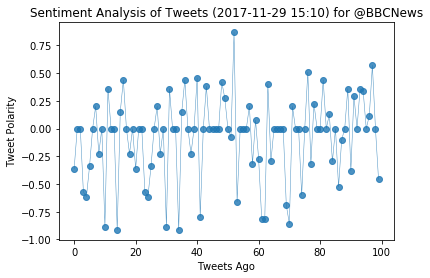

In [34]:
#Graph the 100 tweets from each news source with a timestamp "Tweets Ago". 

plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, target_user))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()